## Import the requirements

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import derl
from derl import EvalRunner, ActorCriticPolicy
from models import ContinuousActorCriticModel
from utils import make_mlp_class, eval_parser, parse_arg_archive
from types import SimpleNamespace

## Instanciate the environment

In [2]:
tf.enable_eager_execution()

logdir = "logdir/ltc/inv_pendulum_cat"
eval_steps = 128
render = True


run_args = parse_arg_archive(logdir + '/args.txt')

env = derl.env.make(run_args.env_id)
if hasattr(run_args, 'seed'):
    env.seed(run_args.seed)
policy = make_mlp_class(run_args.policy_net, run_args.recurrent_policy, run_args)(env.action_space.shape[0])
value = make_mlp_class(run_args.value_net, run_args.recurrent_value, run_args)(1)
model = ContinuousActorCriticModel(env.observation_space.shape,
                                    env.action_space.shape[0],
                                    policy, value)
model.load_weights(logdir+'/model') # load the weights from the logged policy
policy_object = ActorCriticPolicy(model)
runner = EvalRunner(env, policy_object, eval_steps, render)
trajectory = runner.get_next()

2022-04-29 11:08:52.636404: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA


Creating window glfw
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/Users/renard/miniconda3/envs/nodeRL/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "/Users/renard/miniconda3/envs/nodeRL/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "/Users/renard/miniconda3/envs/nodeRL/lib/python3.7/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()  File "/Users/renard/miniconda3/envs/nodeRL/lib/python3.7/site-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()  File "/Users/renard/miniconda3/envs/nodeRL/li

## Run the experiment

In [6]:
trajectory = runner.get_next()

## Plots

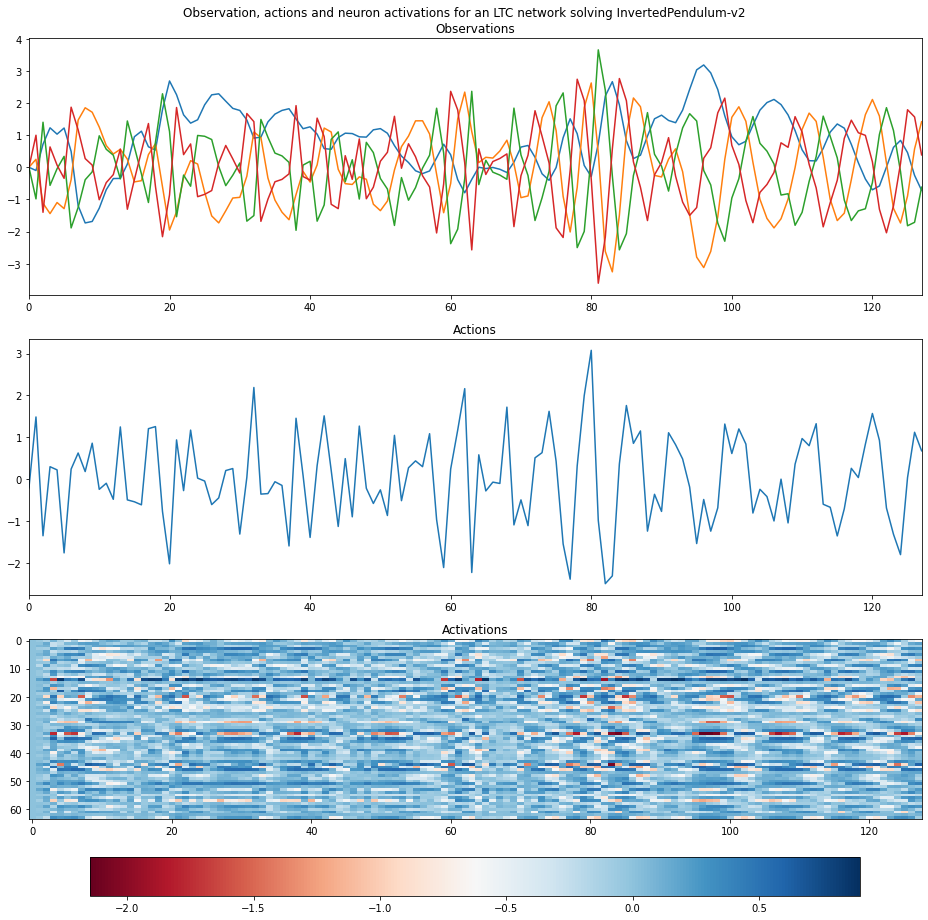

In [3]:
plt.rcParams["figure.figsize"]=13,13

policy_states = trajectory['states'][:,0,0,:]
fig, axs = plt.subplots(3,1)
axs[0].plot(trajectory['observations'])
axs[0].set_xlim([0, 127])
axs[0].set_title("Observations")
axs[1].plot(trajectory['actions'])
axs[1].set_xlim([0, 127])
axs[1].set_title("Actions")
activations = axs[2].imshow(np.transpose(policy_states),aspect="auto", cmap='RdBu',interpolation = 'nearest')
axs[2].set_title("Activations")

fig.suptitle('Observation, actions and neuron activations for an LTC network solving InvertedPendulum-v2')

cbar = fig.colorbar(activations, ax=axs[2],orientation="horizontal")

fig.tight_layout()